In [3]:
import pandas as pd 
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [6]:
train_csv = pd.read_csv('train.csv')
test_csv = pd.read_csv('test.csv')

train_csv

,application_1,cc_1,cc_2,cc_3,cc_4,feature_1,mb_1,cc_5,cc_6,feature_2,...,cc_21,application_15,feature_25,feature_26,cc_22,partner_24,application_16,retro_date,successful_utilization,treatment
0,NaN,1.0,Representatives,123.0,Первичная ДК,1,14.0,147000.0,PLT,0.0,...,NaN,0,1.0,0.0,-1.2,1.0,0,2024-07-04,0,1
1,NaN,1.0,Offline,43.0,Airports,0,1.0,120000.0,PLT,0.0,...,1.0,0,1.0,0.0,-1.2,1.0,0,2024-06-06,0,1
2,0.0,1.0,Web,2.0,seo,0,NaN,15000.0,PLT,0.0,...,NaN,0,NaN,0.0,-1.2,1.0,0,2024-07-21,1,1
3,0.0,1.0,MB,2.0,One Click Offer,0,91.0,260000.0,PLT,0.0,...,1.0,0,NaN,1.0,-1.2,1.0,0,2024-05-23,0,1
4,0.0,1.0,Representatives,123.0,Первичная ДК,1,1.0,130000.0,PLT,0.0,...,NaN,0,1.0,0.0,-1.2,1.0,0,2024-06-28,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
297245,NaN,1.0,Representatives,123.0,Первичная ДК,1,34.0,95000.0,PLT,0.0,...,NaN,0,1.0,0.0,-1.2,1.0,0,2024-05-13,1,1
297246,NaN,1.0,Representatives,123.0,Первичная ДК,1,1.0,83000.0,PLT,0.0,...,NaN,0,1.0,0.0,-1.2,NaN,0,2024-07-08,0,1
297247,0.0,1.0,Mobile Warm,2.0,TOOS cor clients,0,2.0,170000.0,PLT,0.0,...,1.0,0,NaN,0.0,1.0,1.0,0,2024-06-12,0,1
297248,0.0,1.0,Representatives,123.0,Первичная ДК,1,5.0,15000.0,PLT,0.0,...,0.0,0,1.0,0.0,-1.2,1.0,0,2024-06-02,1,1


In [7]:
sample_sub_csv = pd.read_csv('sample_submission.csv').drop(columns=['Unnamed: 0'])

In [8]:
def get_cols_by_substr(df, substr):
    return [col for col in df.columns if substr in col]

In [9]:
target = "successful_utilization"

In [10]:
mb_cols = get_cols_by_substr(train_csv, 'mb')
app_cols = get_cols_by_substr(train_csv, 'application')
bki_cols = get_cols_by_substr(train_csv, 'bki')
partner_cols = get_cols_by_substr(train_csv, 'partner')
graph_cols = get_cols_by_substr(train_csv, 'graph')
feature_cols = get_cols_by_substr(train_csv, 'feature')

In [11]:
train_csv['year'] = train_csv['retro_date'].apply(lambda x: int(x.split('-')[0]))
train_csv['month'] = train_csv['retro_date'].apply(lambda x: int(x.split('-')[1]))
train_csv['day'] = train_csv['retro_date'].apply(lambda x: int(x.split('-')[2]))

In [74]:
train_csv.groupby('month')[target].agg(['mean'])

,mean
month,
4,0.167356
5,0.243414
6,0.234508
7,0.252198


<Axes: >

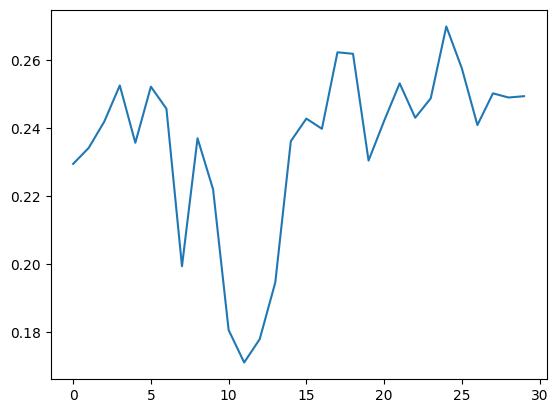

In [75]:
a = train_csv.groupby(['month','day'])[target].agg(['mean']).reset_index()
a[a['month'] == 6]['mean'].reset_index(drop=True).plot()

In [76]:
train_csv.select_dtypes(include='object').apply(lambda x: x.unique().size)

cc_2          11
cc_4          76
cc_6          12
retro_date    90
dtype: int64

In [12]:
train_csv['cc_2'].fillna('missing', inplace=True)
b = (train_csv['cc_2'].value_counts() / train_csv['cc_2'].shape[0]).reset_index()
train_csv['cc_2_num'] = train_csv['cc_2'].apply(lambda x: b[b['cc_2'] == x]['count'].values[0])

In [13]:
train_csv['cc_4'].fillna('missing', inplace=True)
b = (train_csv['cc_4'].value_counts() / train_csv['cc_4'].shape[0]).reset_index()
train_csv['cc_4_num'] = train_csv['cc_4'].apply(lambda x: b[b['cc_4'] == x]['count'].values[0])

In [14]:
train_csv['cc_6'].fillna('missing', inplace=True)
b = (train_csv['cc_6'].value_counts() / train_csv['cc_6'].shape[0]).reset_index()
train_csv['cc_6_num'] = train_csv['cc_6'].apply(lambda x: b[b['cc_6'] == x]['count'].values[0])

In [15]:
test_csv['cc_2'].fillna('missing', inplace=True)
b = (train_csv['cc_2'].value_counts() / train_csv['cc_2'].shape[0]).reset_index()
test_csv['cc_2_num'] = test_csv['cc_2'].apply(lambda x: b[b['cc_2'] == x]['count'].values[0])

test_csv['cc_4'].fillna('missing', inplace=True)
b = (train_csv['cc_4'].value_counts() / train_csv['cc_4'].shape[0]).reset_index()
test_csv['cc_4_num'] = test_csv['cc_4'].apply(lambda x: b[b['cc_4'] == x]['count'].values[0])

test_csv['cc_6'].fillna('missing', inplace=True)
b = (train_csv['cc_6'].value_counts() / train_csv['cc_6'].shape[0]).reset_index()
test_csv['cc_6_num'] = test_csv['cc_6'].apply(lambda x: b[b['cc_6'] == x]['count'].values[0])

In [16]:
cc_cols = list(set(get_cols_by_substr(train_csv, 'cc')) - {'cc_2', 'cc_4', 'cc_6'})

In [17]:
good_cols = list((set(mb_cols) | set(app_cols) | set(bki_cols) | set(partner_cols) | set(graph_cols) | set(feature_cols) | set(cc_cols) | {'treatment'}))

In [18]:
obj_cols = ['cc_2', 'cc_4', 'cc_6']

In [19]:
from sklearn.preprocessing import OneHotEncoder

ohe = OneHotEncoder(sparse_output=False, handle_unknown='ignore')
ohe.fit(train_csv[obj_cols])

OneHotEncoder(handle_unknown='ignore', sparse_output=False)

In [20]:
train_df = train_csv[good_cols].copy(deep=True)
test_df = test_csv[list(set(good_cols) - {'treatment', target})].copy(deep=True)

In [21]:
train_df = pd.concat([train_df, pd.DataFrame(ohe.transform(train_csv[obj_cols]), columns=ohe.get_feature_names_out(obj_cols))], axis=1)
train_df

,mb_2,bki_6,feature_17,bki_2,bki_34,application_16,partner_7,cc_19,cc_9,bki_31,...,cc_6_AGC,cc_6_ALC,cc_6_LKC,cc_6_LMC,cc_6_NON,cc_6_PLT,cc_6_S7C,cc_6_SCB,cc_6_TDC,cc_6_missing
0,3.0,0.00,1.0,-6.673562,0.286596,0,1804000.0,0.6232,0.2599,-0.058059,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
1,415.0,3385.80,0.0,-4.686567,0.122985,0,447045.0,0.3823,0.1482,-3.869657,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
2,NaN,NaN,0.0,NaN,NaN,0,670000.0,NaN,NaN,NaN,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
3,645.0,0.00,0.0,-4.991542,1.558794,0,0.0,NaN,NaN,NaN,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
4,3.0,2722.00,1.0,-4.789341,0.000000,0,0.0,0.1567,0.2604,NaN,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
297245,9.0,8364.29,1.0,-2.874227,0.713344,0,435000.0,0.1480,0.0647,-1.333166,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
297246,3.0,0.00,1.0,-4.828161,0.280246,0,NaN,0.3235,0.3027,-0.454124,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
297247,494.0,16141.00,0.0,-5.357105,0.503654,0,1316636.1,NaN,NaN,NaN,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
297248,3.0,4538.00,1.0,-4.991304,0.541192,0,3495168.0,1.1928,0.0971,1.048926,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0


In [22]:
test_df = pd.concat([test_df, pd.DataFrame(ohe.transform(test_csv[obj_cols]), columns=ohe.get_feature_names_out(obj_cols))], axis=1)
test_df

,feature_17,mb_2,bki_6,bki_2,bki_34,application_16,cc_19,partner_7,cc_9,bki_31,...,cc_6_AGC,cc_6_ALC,cc_6_LKC,cc_6_LMC,cc_6_NON,cc_6_PLT,cc_6_S7C,cc_6_SCB,cc_6_TDC,cc_6_missing
0,0.0,123.0,16574.0,-3.711269,9.158507,0,0.6391,277000.00,0.0597,-2.024245,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1,0.0,637.0,0.0,-3.803099,-1.000000,0,0.2744,45000.00,0.2919,NaN,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2,0.0,22.0,48360.0,-4.371029,0.196100,0,0.7522,4308434.59,0.2008,-2.651593,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
3,1.0,466.0,0.0,-5.775191,-1.000000,0,0.1333,20000.00,0.4294,NaN,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
4,1.0,5.0,9865.0,-4.591791,0.306114,0,0.4678,784500.00,0.2259,-2.228056,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
74308,1.0,NaN,12155.0,-4.449921,0.267251,0,1.3879,728728.00,0.0645,-1.117086,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
74309,0.0,12.0,0.0,-4.637889,5.654361,0,0.7318,925514.19,0.2787,NaN,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
74310,0.0,505.0,31664.0,-3.116618,0.779673,1,NaN,125000.00,NaN,1.030774,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
74311,1.0,669.0,0.0,-5.749429,0.000000,0,0.6900,275000.00,0.3834,-5.868822,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0


In [23]:
a = train_df.isna().sum().sort_values(ascending=False)
cols_with_na = list(a[a > 0].index)

In [24]:
for col in cols_with_na:
    na_count = train_df[col].isna().sum()
    min_val = train_df[col].min()
    if min_val >= 0:
        train_df[col].fillna(-1, inplace=True)
    else:
        train_df[col].fillna(train_df[col].mean(), inplace=True)

In [25]:
bin_cols = []

# for col in train_df.columns:
#     if train_df[col].unique().size == 2:
        # print(f"{col:<30} {train_df[col].unique()}")

train_df["cc_1"] = train_df["cc_1"].apply(lambda x: 1 if x == 1 else 0)
train_df["feature_6"] = train_df["feature_6"].apply(lambda x: 1 if x == 1 else 0)


for col in train_df.columns:
    if train_df[col].unique().size == 2:
        bin_cols.append(col)

In [26]:
for col in cols_with_na:
    na_count = test_df[col].isna().sum()
    min_val = test_df[col].min()
    if min_val >= 0:
        test_df[col].fillna(-1, inplace=True)
    else:
        test_df[col].fillna(test_df[col].mean(), inplace=True)

In [27]:
test_df["cc_1"] = test_df["cc_1"].apply(lambda x: 1 if x == 1 else 0)
test_df["feature_6"] = train_df["feature_6"].apply(lambda x: 1 if x == 1 else 0)

In [28]:
X_train = train_df.drop(columns=[target])
y_train = train_df[target]

In [29]:
from sklearn.model_selection import train_test_split


X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=43)

In [219]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(n_estimators=100, random_state=43)
rf.fit(X_train, y_train)

RandomForestClassifier(random_state=43)

In [223]:
from sklearn.metrics import roc_auc_score, f1_score

y_val_pred = rf.predict_proba(X_val)[:,1]

print(roc_auc_score(y_val, y_val_pred))
f1_score(y_val, y_val_pred > 0.5)

0.7042639153593152


0.15746396286342537

In [30]:
X_test_0 = test_df.copy(deep=True)
X_test_0['treatment'] = 0

X_test_1 = test_df.copy(deep=True)
X_test_1['treatment'] = 1

In [34]:
set(X_test_0.columns) == set(X_train.columns)

True

In [31]:
X_test_0 = X_test_0[X_train.columns]
X_test_1 = X_test_1[X_train.columns]

In [242]:
pred_0 = rf.predict_proba(X_test_0)[:,1]
pred_1 = rf.predict_proba(X_test_1)[:,1]

In [250]:
rf_uplift = pred_1 - pred_0
rf_uplift

array([ 0.  ,  0.  ,  0.01, ..., -0.01,  0.  , -0.01])

In [254]:
sample_sub_csv['successful_utilization'] = rf_uplift
sample_sub_csv.to_csv('rf_uplift.csv')

In [255]:
from sklearn.linear_model import LogisticRegression

# Создаем и обучаем модель логистической регрессии с регуляризацией
log_reg = LogisticRegression(C=0.1, random_state=43)
log_reg.fit(X_train, y_train)

c:\Users\Vex\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(C=0.1, random_state=43)

In [258]:
y_val_pred = log_reg.predict_proba(X_val)[:,1]

print(roc_auc_score(y_val, y_val_pred))
f1_score(y_val, y_val_pred > 0.5)

0.5335932099508279


0.0047241906349868

In [259]:
pred_0 = log_reg.predict_proba(X_test_0)[:,1]
pred_1 = log_reg.predict_proba(X_test_1)[:,1]
log_reg_uplift = pred_1 - pred_0
log_reg_uplift

array([-5.18862731e-13, -4.14057677e-13, -4.64246697e-14, ...,
       -4.14168699e-13, -5.14477350e-13, -9.03790931e-14])

In [260]:
sample_sub_csv['successful_utilization'] = log_reg_uplift
sample_sub_csv.to_csv('log_reg_uplift.csv')

In [32]:
from catboost import CatBoostClassifier

In [35]:
catboost_model = CatBoostClassifier(
    iterations=500,
    depth=5,
    learning_rate=0.133,
    verbose=False,
    eval_metric = 'AUC',
    use_best_model=True 
)

catboost_model.fit(X_train, y_train, eval_set=(X_val, y_val), logging_level='Verbose')


bestTest = 0.7365775472
bestIteration = 467

Shrink model to first 468 iterations.


In [36]:
pred_0 = catboost_model.predict_proba(X_test_0)[:,1]
pred_1 = catboost_model.predict_proba(X_test_1)[:,1]
cat_uplift = pred_1 - pred_0
cat_uplift

array([0.00416851, 0.00140152, 0.08239472, ..., 0.00871577, 0.05652422,
       0.05556093])

In [37]:
sample_sub_csv['successful_utilization'] = cat_uplift
sample_sub_csv.to_csv('cat_uplift_try_to.csv')

In [98]:
from sklearn.preprocessing import StandardScaler

train_df_scaled = train_df.copy(deep=True)

cols_to_scale = list(set(train_df.columns) - set(bin_cols))

scaler = StandardScaler()

train_df_scaled[cols_to_scale] = scaler.fit_transform(train_df[cols_to_scale])

X_train_scaled = train_df_scaled.drop(columns=[target])
y_train_scaled = train_df_scaled[target]
X_train_scaled, X_val_scaled, y_train_scaled, y_val_scaled = train_test_split(X_train, y_train, test_size=0.2, random_state=43)

##############

test_df_scaled = test_df.copy(deep=True)
test_df_scaled[cols_to_scale] = scaler.transform(test_df_scaled[cols_to_scale])

X_test_scaled_0 = test_df_scaled.copy(deep=True)
X_test_scaled_0['treatment'] = 0

X_test_scaled_1 = test_df_scaled.copy(deep=True)
X_test_scaled_1['treatment'] = 1

X_test_scaled_0 = X_test_scaled_0[X_train_scaled.columns]
X_test_scaled_1 = X_test_scaled_1[X_train_scaled.columns]

In [41]:
catboost_model = CatBoostClassifier(
    iterations=500,
    depth=5,
    learning_rate=0.133,
    verbose=False,
    eval_metric = 'AUC',
    use_best_model=True 
)

catboost_model.fit(X_train_scaled, y_train_scaled, eval_set=(X_val_scaled, y_val_scaled), logging_level='Verbose')


bestTest = 0.7451718968
bestIteration = 499



In [42]:
pred_0 = catboost_model.predict_proba(X_test_0)[:,1]
pred_1 = catboost_model.predict_proba(X_test_1)[:,1]
cat_3_uplift = pred_1 - pred_0
cat_3_uplift

array([0.00892956, 0.00155634, 0.08885376, ..., 0.01251539, 0.04992856,
       0.0477563 ])

In [43]:
sample_sub_csv['successful_utilization'] = cat_3_uplift
sample_sub_csv.to_csv('cat_3_uplift.csv')

---

In [264]:
catboost_model_2 = CatBoostClassifier(
    iterations=500,
    depth=6,
    learning_rate=0.047545365704498625,
    verbose=False,
    eval_metric = 'AUC',
    use_best_model=True,
    min_data_in_leaf=77,
    l2_leaf_reg=12
)

catboost_model_2.fit(X_train, y_train, eval_set=(X_val, y_val), logging_level='Verbose')


bestTest = 0.7347244619
bestIteration = 498

Shrink model to first 499 iterations.


In [265]:
pred_0 = catboost_model_2.predict_proba(X_test_0)[:,1]
pred_1 = catboost_model_2.predict_proba(X_test_1)[:,1]
cat_2_uplift = pred_1 - pred_0
cat_2_uplift

array([0.00619253, 0.00216845, 0.08103986, ..., 0.01104365, 0.05259262,
       0.06130486])

In [266]:
sample_sub_csv['successful_utilization'] = cat_2_uplift
sample_sub_csv.to_csv('cat_2_uplift.csv')

---

In [44]:
catboost_model_4 = CatBoostClassifier(
    iterations=500,
    depth=8,
    learning_rate=0.17140896910215309,
    verbose=False,
    eval_metric='AUC',
    use_best_model=True,
    min_data_in_leaf=71,
    l2_leaf_reg=6
)

catboost_model_4.fit(X_train, y_train, eval_set=(X_val, y_val), logging_level='Verbose')


bestTest = 0.7352233746
bestIteration = 214

Shrink model to first 215 iterations.


In [45]:
pred_0 = catboost_model_4.predict_proba(X_test_0)[:,1]
pred_1 = catboost_model_4.predict_proba(X_test_1)[:,1]
cat_4_uplift = pred_1 - pred_0
cat_4_uplift

array([0.00449394, 0.00239929, 0.12088898, ..., 0.0211377 , 0.023566  ,
       0.09199968])

In [46]:
sample_sub_csv['successful_utilization'] = cat_4_uplift
sample_sub_csv.to_csv('cat_4_uplift.csv')

---

In [33]:
def get_uplift(model):
    pred_0 = model.predict_proba(X_test_0)[:,1]
    pred_1 = model.predict_proba(X_test_1)[:,1]
    uplift = pred_1 - pred_0
    return uplift

In [54]:
for acw in ['Balanced', 'SqrtBalanced']:
    catboost_model_for_1 = CatBoostClassifier(
        iterations=500,
        depth=5,
        learning_rate=0.133,
        verbose=False,
        eval_metric = 'AUC',
        auto_class_weights=acw,
        use_best_model=True
    )

    catboost_model_for_2 = CatBoostClassifier(
        iterations=500,
        depth=6,
        learning_rate=0.047545365704498625,
        verbose=False,
        eval_metric = 'AUC',
        use_best_model=True,
        min_data_in_leaf=77,
        auto_class_weights=acw,
        l2_leaf_reg=12
    )

    catboost_model_for_3 = CatBoostClassifier(
        iterations=500,
        depth=8,
        learning_rate=0.17140896910215309,
        verbose=False,
        eval_metric='AUC',
        use_best_model=True,
        min_data_in_leaf=71,
        auto_class_weights=acw,
        l2_leaf_reg=6
    )

    catboost_model_for_1.fit(X_train, y_train, eval_set=(X_val, y_val), logging_level='Verbose')
    catboost_model_for_2.fit(X_train, y_train, eval_set=(X_val, y_val), logging_level='Verbose')
    catboost_model_for_3.fit(X_train, y_train, eval_set=(X_val, y_val), logging_level='Verbose')

    for i, model in enumerate([catboost_model_for_1, catboost_model_for_2, catboost_model_for_3]):
        uplift = get_uplift(model)
        sample_sub_csv['successful_utilization'] = uplift
        sample_sub_csv.to_csv(f'cat_in_for_{acw}_{i}_uplift.csv')


bestTest = 0.736781361
bestIteration = 488

Shrink model to first 489 iterations.

bestTest = 0.7352630111
bestIteration = 495

Shrink model to first 496 iterations.

bestTest = 0.7328605599
bestIteration = 163

Shrink model to first 164 iterations.

bestTest = 0.7365789621
bestIteration = 409

Shrink model to first 410 iterations.

bestTest = 0.7350484708
bestIteration = 499


bestTest = 0.7328406553
bestIteration = 146

Shrink model to first 147 iterations.


In [55]:
for acw in ['Balanced', 'SqrtBalanced']:
    catboost_model_for_1 = CatBoostClassifier(
        iterations=500,
        depth=5,
        learning_rate=0.133,
        verbose=False,
        eval_metric = 'AUC',
        auto_class_weights=acw,
        use_best_model=True
    )

    catboost_model_for_2 = CatBoostClassifier(
        iterations=500,
        depth=6,
        learning_rate=0.047545365704498625,
        verbose=False,
        eval_metric = 'AUC',
        use_best_model=True,
        min_data_in_leaf=77,
        auto_class_weights=acw,
        l2_leaf_reg=12
    )

    catboost_model_for_3 = CatBoostClassifier(
        iterations=500,
        depth=8,
        learning_rate=0.17140896910215309,
        verbose=False,
        eval_metric='AUC',
        use_best_model=True,
        min_data_in_leaf=71,
        auto_class_weights=acw,
        l2_leaf_reg=6
    )

    catboost_model_for_1.fit(X_train_scaled, y_train_scaled, eval_set=(X_val_scaled, y_val_scaled), logging_level='Verbose')
    catboost_model_for_2.fit(X_train_scaled, y_train_scaled, eval_set=(X_val_scaled, y_val_scaled), logging_level='Verbose')
    catboost_model_for_3.fit(X_train_scaled, y_train_scaled, eval_set=(X_val_scaled, y_val_scaled), logging_level='Verbose')

    for i, model in enumerate([catboost_model_for_1, catboost_model_for_2, catboost_model_for_3]):
        uplift = get_uplift(model)
        sample_sub_csv['successful_utilization'] = uplift
        sample_sub_csv.to_csv(f'cat_in_for_scaled_{acw}_{i}_uplift.csv')


bestTest = 0.744917244
bestIteration = 406

Shrink model to first 407 iterations.

bestTest = 0.7441945967
bestIteration = 499


bestTest = 0.7425316793
bestIteration = 156

Shrink model to first 157 iterations.

bestTest = 0.7447506202
bestIteration = 499


bestTest = 0.7444777024
bestIteration = 498

Shrink model to first 499 iterations.

bestTest = 0.7408540948
bestIteration = 155

Shrink model to first 156 iterations.


{'l2_leaf_reg': 13, 'learning_rate': 0.06634652455152674, 'depth': 8, 'min_data_in_leaf': 69}

In [104]:
catboost_model_5 = CatBoostClassifier(
        iterations=500,
        depth=8,
        learning_rate=0.06634652455152674,
        verbose=False,
        eval_metric='AUC',
        use_best_model=True,
        min_data_in_leaf=69,
        auto_class_weights='SqrtBalanced',
        l2_leaf_reg=13
    )

catboost_model_5.fit(X_train, y_train, eval_set=(X_val, y_val), logging_level='Verbose')
uplift = get_uplift(catboost_model_5)
sample_sub_csv['successful_utilization'] = uplift
sample_sub_csv.to_csv(f'cat_5_uplift.csv')


bestTest = 0.73708818
bestIteration = 495

Shrink model to first 496 iterations.


In [105]:
catboost_model_5 = CatBoostClassifier(
        iterations=500,
        depth=8,
        learning_rate=0.06634652455152674,
        verbose=False,
        eval_metric='AUC',
        use_best_model=True,
        min_data_in_leaf=69,
        auto_class_weights='SqrtBalanced',
        l2_leaf_reg=13
    )

catboost_model_5.fit(X_train_scaled, y_train_scaled, eval_set=(X_val_scaled, y_val_scaled), logging_level='Verbose')
uplift = get_uplift(catboost_model_5)
sample_sub_csv['successful_utilization'] = uplift
sample_sub_csv.to_csv(f'cat_scaled_5_uplift.csv')


bestTest = 0.7457546973
bestIteration = 471

Shrink model to first 472 iterations.


In [109]:
catboost_model_6 = CatBoostClassifier(
        iterations=1000,
        depth=5,
        learning_rate=0.133,
        verbose=False,
        eval_metric = 'AUC',
        auto_class_weights='SqrtBalanced',
        use_best_model=True
    )

catboost_model_6.fit(X_train_scaled, y_train_scaled, eval_set=(X_val, y_val), logging_level='Verbose')
uplift = get_uplift(catboost_model_6)
sample_sub_csv['successful_utilization'] = uplift
sample_sub_csv.to_csv(f'cat_6_uplift.csv')


bestTest = 0.7365789621
bestIteration = 409

Shrink model to first 410 iterations.


In [34]:
catboost_model_7 = CatBoostClassifier(
        iterations=500,
        depth=8,
        learning_rate=0.08026668690381228,
        verbose=False,
        eval_metric='AUC',
        use_best_model=True,
        min_data_in_leaf=362,
        auto_class_weights='SqrtBalanced',
        l2_leaf_reg=30
    )

catboost_model_7.fit(X_train, y_train, eval_set=(X_val, y_val), logging_level='Verbose')
uplift = get_uplift(catboost_model_7)
sample_sub_csv['successful_utilization'] = uplift
sample_sub_csv.to_csv(f'cat_7_uplift.csv')


bestTest = 0.7369787301
bestIteration = 430

Shrink model to first 431 iterations.


In [110]:
X_test_0.shape[1]

249

In [111]:
import torch
from torch import nn

class Perceptron(nn.Module):
    def __init__(self, input_dim):
        super().__init__()
        self.fc = nn.Sequential(
            nn.Linear(input_dim, 512),
            nn.ReLU(),
            nn.Linear(512, 2048),
            nn.BatchNorm1d(2048),
            nn.ReLU(),
            nn.Linear(2048, 4096),
            nn.ReLU(),
            nn.Linear(4096, 2048),
            nn.BatchNorm1d(2048),
            nn.ReLU(),
            nn.Linear(2048, 512),
            nn.ReLU(),
            nn.Linear(512, 1),
            nn.Sigmoid()
        )
    
    def forward(self, x):
        return self.fc(x)

input_dim = X_test_0.shape[1]

In [114]:
device = torch.device('cuda:0' if torch.cuda.is_available() else 'cpu')
device

device(type='cuda', index=0)

In [127]:
from torch.utils.data import DataLoader, TensorDataset
from tqdm.notebook import tqdm
import torch.optim as optim

# Convert pandas DataFrame to PyTorch tensors
X_train_tensor = torch.tensor(X_train_scaled.values, dtype=torch.float32)
y_train_tensor = torch.tensor(y_train_scaled.values, dtype=torch.float32).view(-1, 1)

# Create DataLoader
train_dataset = TensorDataset(X_train_tensor, y_train_tensor)
train_loader = DataLoader(train_dataset, batch_size=64, shuffle=True)

# Initialize the model, loss function, and optimizer
model = Perceptron(input_dim).to(device)
criterion = nn.BCELoss()
optimizer = optim.SGD(model.parameters(), lr=1e-4, momentum=0.9)

In [128]:
# Training loop
num_epochs = 10
for epoch in range(num_epochs):
    model.train()
    running_loss = 0.0
    for inputs, labels in tqdm(train_loader):
        inputs, labels = inputs.to(device), labels.to(device)
        optimizer.zero_grad()
        outputs = model(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()
        running_loss += loss.item()
    
    print(f"Epoch {epoch+1}/{num_epochs}, Loss: {running_loss/len(train_loader)}")


  0%|          | 0/2973 [00:00<?, ?it/s]

Epoch 1/10, Loss: 0.5520056132271038


  0%|          | 0/2973 [00:00<?, ?it/s]

Epoch 2/10, Loss: 0.549740234830345


  0%|          | 0/2973 [00:00<?, ?it/s]

Epoch 3/10, Loss: 0.5495618381686296


  0%|          | 0/2973 [00:00<?, ?it/s]

KeyboardInterrupt: 

In [129]:
# Convert pandas DataFrame to PyTorch tensors
X_test_tensor_0 = torch.tensor(X_test_scaled_0.values, dtype=torch.float32).to(device)
X_test_tensor_1 = torch.tensor(X_test_scaled_1.values, dtype=torch.float32).to(device)

# Set the model to evaluation mode
model.eval()

# Get predictions for both treatment and control groups
with torch.no_grad():
    pred_0 = model(X_test_tensor_0).cpu().numpy()
    pred_1 = model(X_test_tensor_1).cpu().numpy()

# Calculate uplift
uplift = pred_1 - pred_0
uplift

array([[ 0.0000000e+00],
       [-2.9802322e-08],
       [ 0.0000000e+00],
       ...,
       [ 0.0000000e+00],
       [ 0.0000000e+00],
       [ 0.0000000e+00]], dtype=float32)

In [130]:
sample_sub_csv['successful_utilization'] = uplift.squeeze()
sample_sub_csv.to_csv('perseptron_scaled_uplift.csv')

In [ ]:
{'l2_leaf_reg': 30, 'learning_rate': 0.08026668690381228, 'depth': 8, 'min_data_in_leaf': 362}

In [ ]:
{'l2_leaf_reg': 29, 'learning_rate': 0.08642150575390405, 'depth': 7, 'min_data_in_leaf': 216}

In [47]:
catboost_model = CatBoostClassifier(
    iterations=500,
    depth=7,
    learning_rate=0.08642150575390405,
    verbose=False,
    eval_metric = 'AUC',
    use_best_model=True,
    l2_leaf_reg=29,
    min_data_in_leaf=216,
    # auto_class_weights='SqrtBalanced',
)

catboost_model.fit(X_train, y_train, eval_set=(X_val, y_val), logging_level='Verbose')


bestTest = 0.7370942764
bestIteration = 493

Shrink model to first 494 iterations.


In [48]:
pred_0 = catboost_model.predict_proba(X_test_0)[:,1]
pred_1 = catboost_model.predict_proba(X_test_1)[:,1]
cat_uplift = pred_1 - pred_0
cat_uplift

array([0.00597014, 0.00091168, 0.08211791, ..., 0.01061226, 0.05041495,
       0.04032944])

In [49]:
sample_sub_csv['successful_utilization'] = cat_uplift
sample_sub_csv.to_csv('cat_uplift_try_to_4.csv')

In [55]:
train_df_treatment_0 = train_df[train_df['treatment'] == 0].copy(deep=True)
train_df_treatment_1 = train_df[train_df['treatment'] == 1].copy(deep=True)

In [57]:
train_df_treatment_1

,mb_2,bki_6,feature_17,bki_2,bki_34,application_16,partner_7,cc_19,cc_9,bki_31,...,cc_6_AGC,cc_6_ALC,cc_6_LKC,cc_6_LMC,cc_6_NON,cc_6_PLT,cc_6_S7C,cc_6_SCB,cc_6_TDC,cc_6_missing
0,3.0,0.00,1.0,-6.673562,0.286596,0,1804000.0,0.6232,0.2599,-0.058059,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
1,415.0,3385.80,0.0,-4.686567,0.122985,0,447045.0,0.3823,0.1482,-3.869657,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
2,-1.0,-1.00,0.0,-4.798385,10.717480,0,670000.0,-1.0000,-1.0000,-1.744420,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
3,645.0,0.00,0.0,-4.991542,1.558794,0,0.0,-1.0000,-1.0000,-1.744420,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
4,3.0,2722.00,1.0,-4.789341,0.000000,0,0.0,0.1567,0.2604,-1.744420,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
297245,9.0,8364.29,1.0,-2.874227,0.713344,0,435000.0,0.1480,0.0647,-1.333166,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
297246,3.0,0.00,1.0,-4.828161,0.280246,0,-1.0,0.3235,0.3027,-0.454124,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
297247,494.0,16141.00,0.0,-5.357105,0.503654,0,1316636.1,-1.0000,-1.0000,-1.744420,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
297248,3.0,4538.00,1.0,-4.991304,0.541192,0,3495168.0,1.1928,0.0971,1.048926,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0


In [58]:
X_train_0 = train_df_treatment_0.drop(columns=[target, 'treatment'])
y_train_0 = train_df_treatment_0[target]

X_train_0, X_val_0, y_train_0, y_val_0 = train_test_split(X_train_0, y_train_0, test_size=0.2, random_state=43)


X_train_1 = train_df_treatment_1.drop(columns=[target, 'treatment'])
y_train_1 = train_df_treatment_1[target]

X_train_1, X_val_1, y_train_1, y_val_1 = train_test_split(X_train_1, y_train_1, test_size=0.2, random_state=43)

In [ ]:
{'l2_leaf_reg': 30, 'learning_rate': 0.08026668690381228, 'depth': 8, 'min_data_in_leaf': 362}

In [67]:
catboost_model_0 = CatBoostClassifier(
    iterations=500,
    depth=8,
    learning_rate=0.08026668690381228,
    verbose=False,
    eval_metric = 'AUC',
    use_best_model=True,
    min_data_in_leaf=362,
    l2_leaf_reg=30,
    auto_class_weights="SqrtBalanced"
)

catboost_model_0.fit(X_train_0, y_train_0, eval_set=(X_val_0, y_val_0), logging_level='Verbose')


bestTest = 0.7171390218
bestIteration = 126

Shrink model to first 127 iterations.


In [68]:
catboost_model_1 = CatBoostClassifier(
    iterations=500,
    depth=8,
    learning_rate=0.08026668690381228,
    verbose=False,
    eval_metric = 'AUC',
    use_best_model=True,
    min_data_in_leaf=362,
    l2_leaf_reg=30,
    auto_class_weights="SqrtBalanced"
)

catboost_model_1.fit(X_train_1, y_train_1, eval_set=(X_val_1, y_val_1), logging_level='Verbose')


bestTest = 0.7410683051
bestIteration = 471

Shrink model to first 472 iterations.


In [69]:
pred_0 = catboost_model_0.predict_proba(test_df)[:,1]
pred_1 = catboost_model_1.predict_proba(test_df)[:,1]
cat_2_uplift = pred_1 - pred_0
cat_2_uplift

array([-0.05365004, -0.02786355,  0.12236553, ..., -0.16052334,
        0.16634168,  0.02452019])

In [70]:
sample_sub_csv['successful_utilization'] = cat_2_uplift
sample_sub_csv.to_csv('cat_2_gyps_balanced_uplift.csv')